In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_df = pd.read_csv("Training Data/Logistic_X_Train.csv")
Y_df = pd.read_csv("Training Data/Logistic_Y_Train.csv")

In [4]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [5]:
Y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [6]:
Y_df.head()

,label
0,1
1,1
2,1
3,0
4,0


In [7]:
# convert data frame into numpy array
X, Y = X_df.values, Y_df.values

In [130]:
class LogisticRegression:
    def __init__(self, X, Y):
        """
        params; X: training independent features
        params; Y: training dependent feature/label
        """
        self.X = np.hstack((np.ones((X.shape[0], 1)), X)) # stacking vector of 1 for W0 (bias) to each sample
        self.Y = Y
        self.W = np.random.randn(self.X.shape[1], 1)
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []
    
    def sigmoid(self, Y):
        return 1.0 / (1.0 + np.exp(-Y))
        
    def predict(self, X):
        # this is Y hypothesis
        Yhypo = np.matmul(X, self.W)
        Yp = self.sigmoid(Yhypo)
        return Yp
        
    def binary_cross_entropy(self, Y, Yp):
        l = np.mean(Y*np.log(Yp) + (1-Y)*np.log(1-Yp))
        return -1.0 * l
    
    def accuracy(self, Y, Yp):
        """
        params; Y: actual label with value 0 or 1
        params; Yp: predicted prob with value between 0 and 1 for label 1
        """
        Yp_label = np.array(Yp > 0.5)
        a = np.mean(Yp_label == Y)
        return a
    
    def gradient(self, X, Y):
        Yp = self.predict(X)
        return np.matmul(X.T, (Yp-Y))
        
    def train(self, learning_rate=0.001, epochs=40, batch_size=200, vsplit=0.2):
        """
        func desc; this function trains the model over dataset 
        """
        # training and validation split
        no_of_samples = self.X.shape[0]
        split_idx = int(no_of_samples * (1 - vsplit))
        
        Xt, Yt = self.X[ : split_idx], self.Y[ : split_idx]
        Xv, Yv = self.X[split_idx : ], self.Y[split_idx : ]
        
        no_of_batches = int(Xt.shape[0]/batch_size)
        for i in range(epochs):
            # shuffle training data on every epoch to avoid residual samples
            train_data = list(zip(Xt, Yt)) # zip can only shuffle list ig
            np.random.shuffle(train_data)
            Xt_tupple, Yt_tupple = zip(*train_data) # unzip the shuffle train data
            Xt, Yt = np.asarray(Xt_tupple), np.asarray(Yt_tupple)
            
            for j in range(no_of_batches):
                
                Xt_batch = Xt[j*batch_size: (j+1)*batch_size]
                Yt_batch = Yt[j*batch_size: (j+1)*batch_size]
                
                Ytp_batch = self.predict(Xt_batch)
                
                self.W = self.W - learning_rate * self.gradient(Xt_batch, Yt_batch)
                
                self.loss.append(self.binary_cross_entropy(Yt_batch, Ytp_batch))
                self.acc.append(self.accuracy(Yt_batch, Ytp_batch))
                
                Yvp = self.predict(Xv)
                self.val_loss.append(self.binary_cross_entropy(Yv, Yvp))
                self.val_acc.append(self.accuracy(Yv, Yvp))
                
                print("epoch: {} |batch:{} |loss: {} |val_loss: {}".format(i, 
                                                                           j, 
                                                                           self.loss[len(self.loss)-1],
                                                                           self.val_loss[len(self.val_loss)-1]
                                                                          ))

In [131]:
lr = LogisticRegression(X, Y)

In [132]:
lr.train()

epoch: 0 |batch:0 |loss: 0.3852191326114246 |val_loss: 0.3576020475269321
epoch: 0 |batch:1 |loss: 0.39652503351473045 |val_loss: 0.3376413248817759
epoch: 0 |batch:2 |loss: 0.36428495132009486 |val_loss: 0.32004030587866045
epoch: 0 |batch:3 |loss: 0.32310917389431965 |val_loss: 0.30450660595841766
epoch: 0 |batch:4 |loss: 0.3015392131345968 |val_loss: 0.29159952227636987
epoch: 0 |batch:5 |loss: 0.2946596894742152 |val_loss: 0.2803795120002881
epoch: 0 |batch:6 |loss: 0.22709077375337489 |val_loss: 0.2705634661064074
epoch: 0 |batch:7 |loss: 0.2511856027318789 |val_loss: 0.2602189873259826
epoch: 0 |batch:8 |loss: 0.26698831373782583 |val_loss: 0.2510409862624735
epoch: 0 |batch:9 |loss: 0.262071255273116 |val_loss: 0.2418274928004207
epoch: 0 |batch:10 |loss: 0.24673879649671107 |val_loss: 0.23375884948757067
epoch: 0 |batch:11 |loss: 0.27582808622246524 |val_loss: 0.22757681685242492
epoch: 1 |batch:0 |loss: 0.21915708259429628 |val_loss: 0.22146521606713823
epoch: 1 |batch:1 |loss

epoch: 11 |batch:1 |loss: 0.1019097862181912 |val_loss: 0.08233457014570163
epoch: 11 |batch:2 |loss: 0.08036289873581577 |val_loss: 0.08211455887970004
epoch: 11 |batch:3 |loss: 0.0826983292066177 |val_loss: 0.08190057884202147
epoch: 11 |batch:4 |loss: 0.07878584789019608 |val_loss: 0.08171200219662283
epoch: 11 |batch:5 |loss: 0.08764053835528351 |val_loss: 0.0814579915271364
epoch: 11 |batch:6 |loss: 0.06901322647213103 |val_loss: 0.08125663978312608
epoch: 11 |batch:7 |loss: 0.07468816887730219 |val_loss: 0.08100369301081795
epoch: 11 |batch:8 |loss: 0.06922311537474828 |val_loss: 0.08079002364193044
epoch: 11 |batch:9 |loss: 0.06960526908380213 |val_loss: 0.08061939780315203
epoch: 11 |batch:10 |loss: 0.09850564223729495 |val_loss: 0.08040489855374568
epoch: 11 |batch:11 |loss: 0.08351709828827233 |val_loss: 0.08015557035998824
epoch: 12 |batch:0 |loss: 0.0969373554061914 |val_loss: 0.07993467624643709
epoch: 12 |batch:1 |loss: 0.0696933221843054 |val_loss: 0.0797009544210817
epo

epoch: 21 |batch:0 |loss: 0.08858677447833069 |val_loss: 0.06586473927308348
epoch: 21 |batch:1 |loss: 0.08043749035641005 |val_loss: 0.06579816058157367
epoch: 21 |batch:2 |loss: 0.057881315960123025 |val_loss: 0.06571965653492991
epoch: 21 |batch:3 |loss: 0.051180768838913496 |val_loss: 0.06563400612261329
epoch: 21 |batch:4 |loss: 0.05171682788029009 |val_loss: 0.06554839190869982
epoch: 21 |batch:5 |loss: 0.050829561696962226 |val_loss: 0.0654627151395238
epoch: 21 |batch:6 |loss: 0.048650735984849466 |val_loss: 0.06537441064337848
epoch: 21 |batch:7 |loss: 0.13197473580986113 |val_loss: 0.06534673261759576
epoch: 21 |batch:8 |loss: 0.04504156872466977 |val_loss: 0.0652742568152335
epoch: 21 |batch:9 |loss: 0.05284351891635208 |val_loss: 0.06520805652731371
epoch: 21 |batch:10 |loss: 0.04548999313601618 |val_loss: 0.06514376367562824
epoch: 21 |batch:11 |loss: 0.041618981019281784 |val_loss: 0.06505845469552247
epoch: 22 |batch:0 |loss: 0.05715239832972866 |val_loss: 0.064996185997

epoch: 30 |batch:0 |loss: 0.04790091577983832 |val_loss: 0.05975807495003975
epoch: 30 |batch:1 |loss: 0.08151829031569026 |val_loss: 0.05972998461639733
epoch: 30 |batch:2 |loss: 0.05594675723791148 |val_loss: 0.05969480600903346
epoch: 30 |batch:3 |loss: 0.0454162451392678 |val_loss: 0.059641015380106195
epoch: 30 |batch:4 |loss: 0.0445738313251983 |val_loss: 0.05958903328668517
epoch: 30 |batch:5 |loss: 0.05998589713455491 |val_loss: 0.05955551881438834
epoch: 30 |batch:6 |loss: 0.04726749925251072 |val_loss: 0.05951689443190452
epoch: 30 |batch:7 |loss: 0.05585348471160415 |val_loss: 0.0594639956270935
epoch: 30 |batch:8 |loss: 0.03458453303035445 |val_loss: 0.05942543464339909
epoch: 30 |batch:9 |loss: 0.049929211396509736 |val_loss: 0.05939171781341766
epoch: 30 |batch:10 |loss: 0.05679802635295903 |val_loss: 0.05935890227633555
epoch: 30 |batch:11 |loss: 0.06557579713616639 |val_loss: 0.05931941039612896
epoch: 31 |batch:0 |loss: 0.06563590759872633 |val_loss: 0.0592723092803256

epoch: 38 |batch:10 |loss: 0.03945949891403443 |val_loss: 0.05638824893475915
epoch: 38 |batch:11 |loss: 0.04987992043213088 |val_loss: 0.056364399452163726
epoch: 39 |batch:0 |loss: 0.02775131579188885 |val_loss: 0.05634094585354769
epoch: 39 |batch:1 |loss: 0.031630426362530745 |val_loss: 0.05632085425944212
epoch: 39 |batch:2 |loss: 0.03478666950739617 |val_loss: 0.05629343326677943
epoch: 39 |batch:3 |loss: 0.057254627023990104 |val_loss: 0.05627731199991614
epoch: 39 |batch:4 |loss: 0.037367337558493266 |val_loss: 0.0562448166413804
epoch: 39 |batch:5 |loss: 0.09445297725327861 |val_loss: 0.056236330906250416
epoch: 39 |batch:6 |loss: 0.0783540547716607 |val_loss: 0.05620344355953601
epoch: 39 |batch:7 |loss: 0.03205830566868664 |val_loss: 0.05617820086741586
epoch: 39 |batch:8 |loss: 0.030581278470925267 |val_loss: 0.05614892801148031
epoch: 39 |batch:9 |loss: 0.03187621812868793 |val_loss: 0.05612250546431179
epoch: 39 |batch:10 |loss: 0.0784544812935874 |val_loss: 0.05609823463

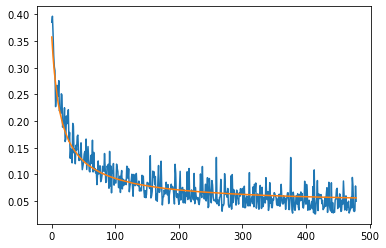

In [133]:
plt.plot(lr.loss)
plt.plot(lr.val_loss)
plt.show()

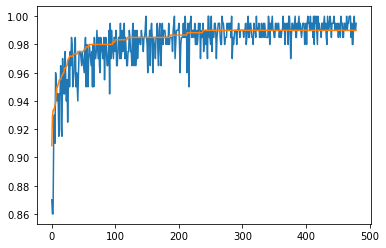

In [134]:
plt.plot(lr.acc)
plt.plot(lr.val_acc)
plt.show()